In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [120]:
train = pd.read_excel('../data/train_universidad.xlsx', sheet_name=1)

In [114]:
train.sample(5)

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
5103,2681,1,AC,37,1,"El humo del tabaco en la entrada, tal vez un ...",NaN,NaN,6.0,NaN,3
573,17679,3,AC,28,1,"Hay demasiados alumnos en determinadas horas,...",NaN,NaN,5.0,NaN,3
11585,28809,4,FC,107,1,Información precisa y concisa sobre algún tema.,NaN,NaN,4.0,NaN,3
12370,16978,1,AC,38,7,Es una universidad con mucha vision sobre com...,NaN,NaN,8.0,NaN,4
2057,19132,3,AC,17,8,Creo que lo que más valoro es todo lo que he ...,NaN,Delegado,5.0,NaN,4


In [113]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COD_ENCUESTADO,20000,NaN,NaN,NaN,16951.7,9634.97,1,8727.75,17070.5,25274.2,33672
Nombre Campus,20000,NaN,NaN,NaN,2.60815,1.05074,1,2,3,3,4
NIVEL ACTUAL,20000,4,AC,14990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clave de carrera,20000,NaN,NaN,NaN,42.3227,44.5185,1,10,26,100,226
Ciclo,20000,NaN,NaN,NaN,3.0524,2.35532,1,1,2,4,14
COMENTARIO,20000,17611,La enseñanza,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IND_GEA,299,1,GEA,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IND_DELEGADO,3532,1,Delegado,3532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANT_CURSOS_MATRICU_SIN_INGLES,19634,NaN,NaN,NaN,4.78496,1.41673,0,4,5,6,10
UOD_depostista_ind_deportista,148,1,Deportista,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
cat_cols = ['COD_ENCUESTADO', 'Nombre Campus', 'NIVEL ACTUAL', 'Clave de carrera']
binary_cols = ['IND_GEA', 'IND_DELEGADO', 'UOD_depostista_ind_deportista']

In [122]:
for c in cat_cols:
    train[c] = train[c].astype(str)

In [123]:
for c in binary_cols:
    train[c] = train[c].notnull()

In [125]:
train.fillna(0, inplace=True)

In [126]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COD_ENCUESTADO,20000,20000,18875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nombre Campus,20000,4,3,8361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIVEL ACTUAL,20000,4,AC,14990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clave de carrera,20000,72,5,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ciclo,20000,NaN,NaN,NaN,3.0524,2.35532,1,1,2,4,14
COMENTARIO,20000,17611,La enseñanza,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IND_GEA,20000,2,False,19701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IND_DELEGADO,20000,2,False,16468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANT_CURSOS_MATRICU_SIN_INGLES,20000,NaN,NaN,NaN,4.6974,1.54329,0,4,5,6,10
UOD_depostista_ind_deportista,20000,2,False,19852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


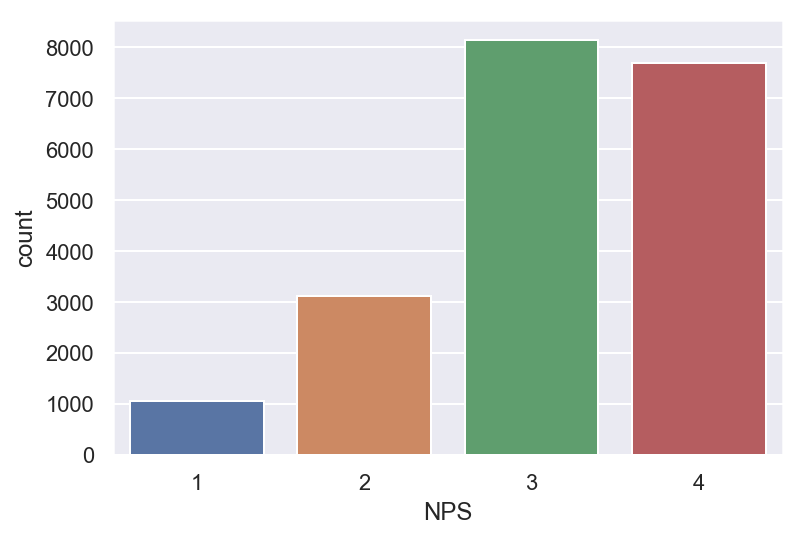

In [135]:
sns.countplot(train.NPS);

In [152]:
train.NPS.value_counts(normalize=True)

3    0.40680
4    0.38480
2    0.15535
1    0.05305
Name: NPS, dtype: float64

# Baseline

In [146]:
cols = [c for c in train if c not in ['COD_ENCUESTADO', 'COMENTARIO', 'NPS']]
X, y = train[cols].copy(), train.NPS

In [144]:
from sklearn.preprocessing import LabelEncoder

In [147]:
lencoders = {}
for c in ['Nombre Campus', 'NIVEL ACTUAL', 'Clave de carrera']:
    lencoders[c] = LabelEncoder()
    X[c] = lencoders[c].fit_transform(X[c])

In [162]:
X.head()

,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista
0,0,0,54,2,False,True,6.0,False
1,2,0,49,1,False,True,5.0,False
2,3,0,56,1,False,False,5.0,False
3,3,0,52,6,True,False,6.0,False
4,2,0,59,1,False,False,6.0,False


In [148]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [149]:
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [160]:
%%time
results = cross_validate(model, X, y, scoring='neg_log_loss', cv=kfolds, 
                         return_train_score=True)

CPU times: user 12.9 s, sys: 219 ms, total: 13.1 s
Wall time: 3.57 s


In [161]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.672135,0.042960,-1.177007,-1.086104
1,0.458142,0.045042,-1.189630,-1.081878
2,0.453618,0.047278,-1.167902,-1.088394
3,0.441986,0.046569,-1.147050,-1.092831
4,0.463638,0.047101,-1.161808,-1.089386


# Text processing

In [169]:
desc = train.COMENTARIO[52]

In [170]:
desc

' La enseñanza y temas son engaña muchachosel curso de calculo que toma 6 meses en otras universidades y en la universidad lo meten en una semana ,lo mismo para los otros cursos de ciencias. LLos pagos deberian bajarlos si desean hacer su metodo blended El acceso a las sede de la misma universidad luego de quitar las sede de alquiler , se convierte en dolor de cabeza para poder llegar . slds No hablo con el higado deberian preocuparse por el futuro de un pais y ser justos con la enseñanza, no es del todo didáctico'

In [174]:
import re, unicodedata

def normalize(text):
    return unicodedata.normalize('NFKD', text) \
           .encode('ascii', 'ignore').decode('utf-8', 'ignore')

def clean(s):
    s = s.lower()
    s = normalize(s)
    s = re.sub('[^a-z]+', ' ', s)
    return s.strip()

In [175]:
clean(desc)

'la ensenanza y temas son engana muchachosel curso de calculo que toma meses en otras universidades y en la universidad lo meten en una semana lo mismo para los otros cursos de ciencias llos pagos deberian bajarlos si desean hacer su metodo blended el acceso a las sede de la misma universidad luego de quitar las sede de alquiler se convierte en dolor de cabeza para poder llegar slds no hablo con el higado deberian preocuparse por el futuro de un pais y ser justos con la ensenanza no es del todo didactico'

In [176]:
train['clean_comment'] = train.COMENTARIO.apply(clean)
train['len_comment'] = train.COMENTARIO.apply(len)
train['nwords_comment'] = train.COMENTARIO.apply(lambda x: len(x.split()))

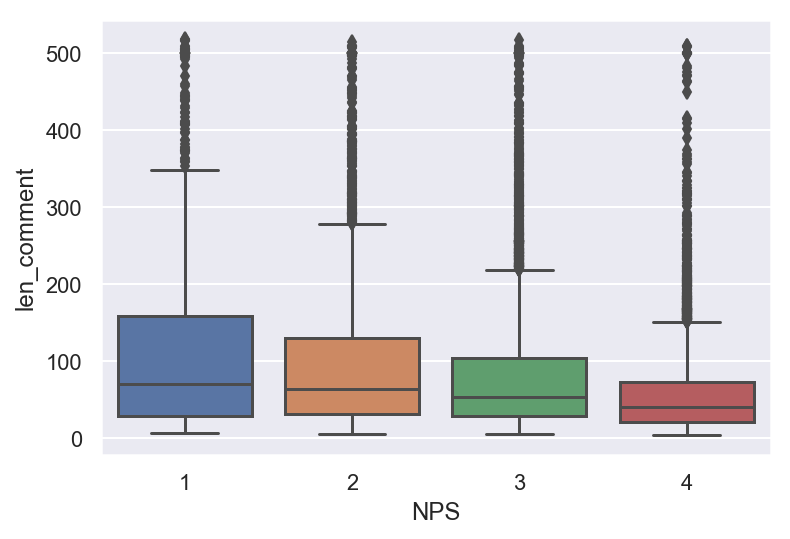

In [183]:
sns.boxplot('NPS', 'len_comment', data=train);

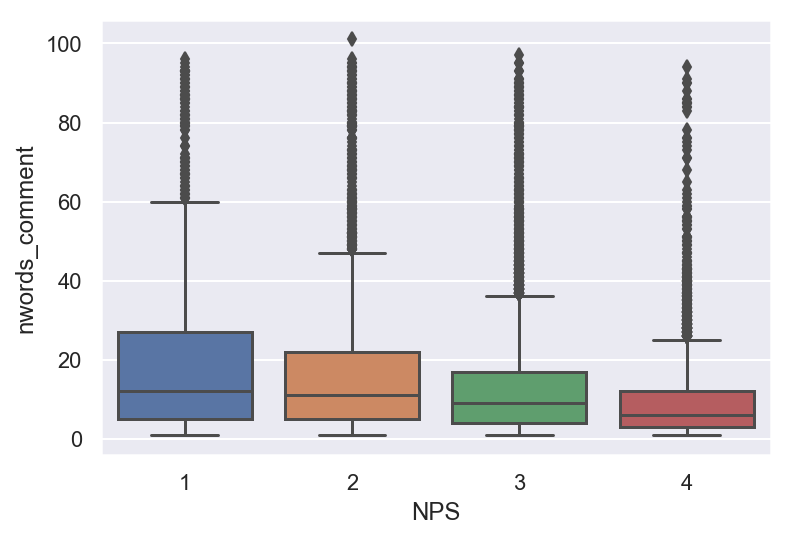

In [186]:
sns.boxplot('NPS', 'nwords_comment', data=train);

In [188]:
from collections import Counter
vocab = Counter(' '.join(train.clean_comment).split())

In [189]:
vocab.most_common()[:10]

[('de', 13130),
 ('la', 11678),
 ('que', 8273),
 ('y', 8078),
 ('en', 7201),
 ('los', 7197),
 ('el', 5916),
 ('no', 4584),
 ('es', 4086),
 ('a', 3602)]

In [190]:
vocab.most_common()[-10:]

[('retroactivos', 1),
 ('desordenan', 1),
 ('primos', 1),
 ('justificada', 1),
 ('ceder', 1),
 ('hipercalorico', 1),
 ('proteico', 1),
 ('estabilizan', 1),
 ('counters', 1),
 ('registrada', 1)]

In [192]:
len(vocab), sum(vocab.values())

(11333, 251571)

## Vectorization

In [194]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(train.clean_comment)
X_count.shape

(20000, 11309)

In [208]:
from stop_words import get_stop_words
stopwords = get_stop_words('spanish')

In [211]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=10, stop_words=stopwords)
X_tfidf = vectorizer.fit_transform(train.clean_comment)
X_tfidf.shape

(20000, 1555)

In [216]:
list(vectorizer.vocabulary_.keys())[:10]

['gusta',
 'metodo',
 'blended',
 'hace',
 'bien',
 'profesores',
 'metodos',
 'ensenanza',
 'buena',
 'uso']

## Only text

In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
model = LGBMClassifier()
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [219]:
%%time
results = cross_validate(model, X_tfidf, y, scoring='neg_log_loss', cv=kfolds, 
                         return_train_score=True, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1min 54s, sys: 2.37 s, total: 1min 56s
Wall time: 32.7 s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.7s finished


In [220]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,6.726469,0.117886,-0.835978,-0.691337
1,6.602429,0.099555,-0.846042,-0.687465
2,5.494077,0.089271,-0.841537,-0.686480
3,6.070568,0.090990,-0.827133,-0.689893
4,5.599091,0.092066,-0.844811,-0.685813


## TF-IDF + metadata

In [221]:
X.head()

,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista
0,0,0,54,2,False,True,6.0,False
1,2,0,49,1,False,True,5.0,False
2,3,0,56,1,False,False,5.0,False
3,3,0,52,6,True,False,6.0,False
4,2,0,59,1,False,False,6.0,False


In [247]:
train['nupper_comment'] = train.COMENTARIO.apply(lambda x: len([c for c in x if c.isupper()]) / len(x.split()))

(-0.1, 1)

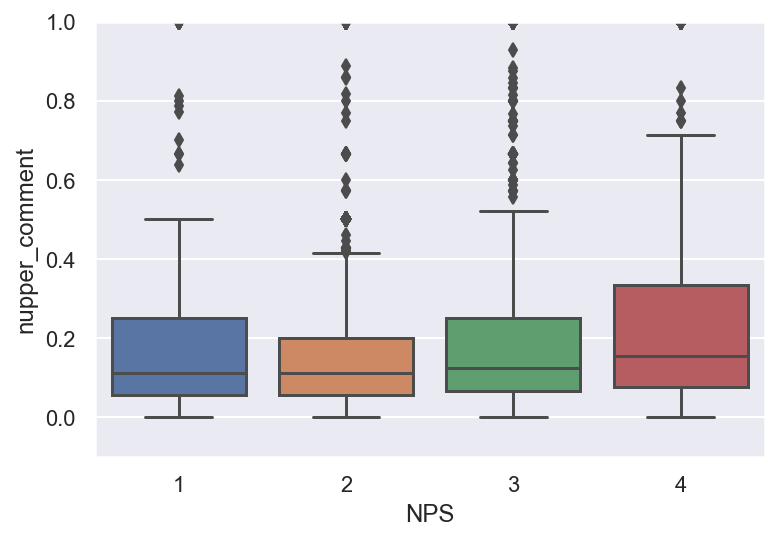

In [252]:
sns.boxplot('NPS', 'nupper_comment', data=train);
plt.ylim(top=1, bottom=-0.1)

In [258]:
X['nwords_comment'] = train.nwords_comment
X['nupper_comment'] = train.nupper_comment

In [259]:
X_all = np.concatenate([X, X_tfidf.toarray()], axis=1)

In [260]:
X_all.shape

(20000, 1565)

In [283]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
model = LGBMClassifier()
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [263]:
%%time
results = cross_validate(model, X_all, y, scoring='neg_log_loss', cv=kfolds, 
                         return_train_score=True, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 2min 13s, sys: 5.92 s, total: 2min 19s
Wall time: 48.1 s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.1s finished


In [264]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,8.382034,0.295074,-0.827897,-0.665709
1,6.750721,0.291588,-0.843740,-0.661271
2,8.467809,0.401192,-0.836867,-0.661394
3,7.767224,0.342295,-0.815952,-0.667034
4,8.369102,0.309568,-0.831560,-0.662230


## N-grams TF-IDF

In [296]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=10, stop_words=stopwords, 
                             ngram_range=(1,3), max_features=2000)
X_tfidf = vectorizer.fit_transform(train.clean_comment)
X_tfidf.shape

(20000, 2000)

In [297]:
%%time
results = cross_validate(model, X_tfidf, y, scoring='neg_log_loss', cv=kfolds, 
                         return_train_score=True)

CPU times: user 2min 20s, sys: 5.35 s, total: 2min 25s
Wall time: 53.3 s


In [298]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,9.933593,0.084156,-0.838813,-0.688879
1,7.785638,0.090851,-0.844693,-0.684781
2,9.562371,0.094110,-0.841344,-0.685359
3,7.600133,0.115838,-0.827403,-0.688153
4,15.908200,0.114154,-0.841416,-0.685181


## Word2Vec

In [271]:
import spacy

nlp = spacy.load('es_core_news_md')
doc = nlp(desc)
pd.DataFrame([(token.text, token.pos_, token.dep_) for token in doc], 
             columns=['TOKEN', 'POS', 'DEP']).head(10)

,TOKEN,POS,DEP
0,,SPACE,
1,La,DET,det
2,enseñanza,NOUN,nsubj
3,y,CONJ,cc
4,temas,NOUN,conj
5,son,AUX,cop
6,engaña,VERB,ROOT
7,muchachosel,ADJ,ccomp
8,curso,NOUN,obj
9,de,ADP,case


In [278]:
from tqdm import tqdm
X_vec = np.array([nlp.tokenizer(d).vector for d in tqdm(train.clean_comment)])

100%|██████████| 20000/20000 [00:09<00:00, 2205.74it/s]


In [279]:
X_vec.shape

(20000, 50)

In [281]:
%%time
results = cross_validate(model, X_vec, y, scoring='neg_log_loss', cv=kfolds, 
                         return_train_score=True)

CPU times: user 1min 13s, sys: 1.55 s, total: 1min 15s
Wall time: 22 s


In [282]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,3.642960,0.063274,-0.862956,-0.567599
1,3.925763,0.064851,-0.857101,-0.564874
2,4.004475,0.073174,-0.867908,-0.564393
3,5.446663,0.071832,-0.846576,-0.570400
4,3.576001,0.052750,-0.872690,-0.562467


## Word2Vec + Metadata

In [284]:
X_all = np.concatenate([X, X_vec], axis=1)

In [286]:
%%time
results = cross_validate(model, X_all, y, scoring='neg_log_loss', cv=kfolds, 
                         return_train_score=True)

CPU times: user 1min 28s, sys: 3.12 s, total: 1min 31s
Wall time: 29.8 s


In [287]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,6.252914,0.071246,-0.854131,-0.553726
1,5.648055,0.066187,-0.856376,-0.552621
2,6.498347,0.063550,-0.859821,-0.550752
3,5.129307,0.061010,-0.836127,-0.557334
4,4.315972,0.062753,-0.856046,-0.551659


# Train with all data

In [436]:
train = pd.read_excel('../data/train_universidad.xlsx', sheet_name=1)

In [437]:
train.columns = ['_'.join(c.strip().lower().split()) for c in train]

In [438]:
train.head()

,cod_encuestado,nombre_campus,nivel_actual,clave_de_carrera,ciclo,comentario,ind_gea,ind_delegado,cant_cursos_matricu_sin_ingles,uod_depostista_ind_deportista,nps
0,13501,1,AC,3,2,Me gusta la u es paja bro y soy pito,NaN,Delegado,6.0,NaN,3
1,23622,3,AC,25,1,El metodo de blended no le hace bien a todos,NaN,Delegado,5.0,NaN,3
2,8354,4,AC,31,1,"Los profesores, sus métodos de enseñanza bes ...",NaN,NaN,5.0,NaN,4
3,17745,4,AC,28,6,Porque posee gran mayoría de profesores espec...,GEA,NaN,6.0,NaN,3
4,10867,3,AC,34,1,La pencion,NaN,NaN,6.0,NaN,3


In [439]:
import re, unicodedata
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

def clean(s):
    s = s.lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore') \
                   .decode('utf-8', 'ignore')
    s = re.sub('[^a-z]+', ' ', s)
    return s.strip()

In [440]:
cols = [c for c in train if c not in ['cod_encuestado', 'comentario', 'nps']]
X, y = train[cols].copy(), train.nps

In [441]:
binary_cols = ['ind_gea', 'ind_delegado', 'uod_depostista_ind_deportista']
for c in binary_cols:
    X[c] = X[c].notnull()
X.fillna(0, inplace=True)

In [442]:
lencoders = {}
cat_cols = ['nombre_campus', 'nivel_actual', 'clave_de_carrera']
for c in cat_cols:
    lencoders[c] = LabelEncoder()
    X[c] = lencoders[c].fit_transform(X[c])

In [444]:
X['nwords_comment'] = train.comentario.apply(lambda x: len(x.split()))
X['nupper_comment'] = train.comentario.apply(lambda x: \
                        len([c for c in x if c.isupper()]) / len(x.split()))

In [445]:
clean_comments = train.comentario.apply(clean)
vectorizer = TfidfVectorizer(max_df=0.7, min_df=10, stop_words=stopwords)
X_tfidf = vectorizer.fit_transform(clean_comments)

In [336]:
X_all = np.concatenate([X, X_tfidf.toarray()], axis=1)
X_all.shape

(20000, 1565)

In [337]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [338]:
model.fit(X_all, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Feature importance

In [446]:
imp = pd.DataFrame()
imp['feature'] = X.columns.tolist() + \
                [f'tfidf_{c}' for c in vectorizer.get_feature_names()]
imp['importance'] = model.feature_importances_

In [447]:
imp.sort_values('importance', ascending=False)[:10]

,feature,importance
8,nwords_comment,334
2,clave_de_carrera,231
9,nupper_comment,195
571,tfidf_ensenanza,173
3,ciclo,168
944,tfidf_mejorar,142
201,tfidf_buena,134
916,tfidf_mas,131
1199,tfidf_profesores,128
643,tfidf_exigencia,128


In [348]:
imp.sort_values('importance', ascending=False)[-10:]

,feature,importance
836,tfidf_justo,0
237,tfidf_capacidad,0
838,tfidf_laborales,0
840,tfidf_laboratorios,0
236,tfidf_caos,0
842,tfidf_lamentablemente,0
843,tfidf_larga,0
844,tfidf_largo,0
845,tfidf_lectura,0
1564,tfidf_zonas,0


# Predict test

In [448]:
test = pd.read_excel('../data/test_universidad.xlsx', sheet_name=0)

In [449]:
test.columns = ['_'.join(c.strip().lower().split()) for c in test]

In [450]:
test.head()

,cod_encuestado,nombre_campus,nivel_actual,clave_de_carrera,ciclo,comentario,ind_gea,ind_delegado,cant_cursos_matricu_sin_ingles,uod_depostista_ind_deportista
0,15118,3,AC,7,6,La universidad debería de ser mas exigente co...,NaN,NaN,5.0,Deportista
1,6715,3,AC,39,1,No me han fallafo en nada,NaN,NaN,5.0,NaN
2,27492,3,FC,101,4,"Prestigio, calidad de enseñanza de los profes...",NaN,NaN,5.0,NaN
3,29693,2,FC,101,4,Educacion de calidad y con exigencia.,NaN,NaN,5.0,NaN
4,29677,2,FC,100,6,No cumplen con los convenios académicos de de...,NaN,NaN,4.0,NaN


In [451]:
test_data = list(test.head(3).to_dict(orient='index').values())

In [452]:
from pprint import pprint

In [453]:
pprint(test_data)

[{'cant_cursos_matricu_sin_ingles': 5.0,
  'ciclo': 6,
  'clave_de_carrera': 7,
  'cod_encuestado': 15118,
  'comentario': ' La universidad debería de ser mas exigente con respecto a '
                'los que ingresan a la universidad. Mucha diferencia '
                'intelectual',
  'ind_delegado': nan,
  'ind_gea': nan,
  'nivel_actual': 'AC',
  'nombre_campus': 3,
  'uod_depostista_ind_deportista': 'Deportista'},
 {'cant_cursos_matricu_sin_ingles': 5.0,
  'ciclo': 1,
  'clave_de_carrera': 39,
  'cod_encuestado': 6715,
  'comentario': ' No me han fallafo en nada',
  'ind_delegado': nan,
  'ind_gea': nan,
  'nivel_actual': 'AC',
  'nombre_campus': 3,
  'uod_depostista_ind_deportista': nan},
 {'cant_cursos_matricu_sin_ingles': 5.0,
  'ciclo': 4,
  'clave_de_carrera': 101,
  'cod_encuestado': 27492,
  'comentario': ' Prestigio, calidad de enseñanza de los profesores y variedad '
                'de horarios.',
  'ind_delegado': nan,
  'ind_gea': nan,
  'nivel_actual': 'FC',
  'nombr

In [454]:
def preprocess(data, filter_cols, binary_cols, cat_cols, lencoders, vectorizer):
    df = pd.DataFrame(data)
    X = df[filter_cols].copy()
    for c in binary_cols:
        X[c] = X[c].notnull()
    X.fillna(0, inplace=True)
    for c in cat_cols:
        X[c] = lencoders[c].transform(X[c])
    X['nwords_comment'] = df.comentario.apply(lambda x: len(x.split()))
    X['nupper_comment'] = df.comentario.apply(lambda x: \
                            len([c for c in x if c.isupper()]) / len(x.split()))
    clean_comments = df.comentario.apply(clean)
    X_tfidf = vectorizer.transform(clean_comments)
    X_all = np.concatenate([X, X_tfidf.toarray()], axis=1)
    return X_all

In [455]:
X_test = preprocess(test_data, cols, binary_cols, cat_cols, lencoders,
                    vectorizer)

In [456]:
X_test.shape

(3, 1565)

In [457]:
list(model.predict(X_test))

[3, 3, 4]

In [458]:
def predict(model, data, filter_cols, binary_cols, cat_cols, 
            lencoders, vectorizer):
    X = preprocess(data, filter_cols, binary_cols, cat_cols, lencoders,
                    vectorizer)
    return list(model.predict(X))

In [459]:
predict(model, test_data, cols, binary_cols, cat_cols, lencoders,
                    vectorizer)

[3, 3, 4]

In [460]:
params = {
    'filter_cols': cols,
    'binary_cols': binary_cols,
    'cat_cols': cat_cols,
    'lencoders': lencoders,
    'vectorizer': vectorizer
}

In [461]:
%%time
predict(model, test_data, **params)

CPU times: user 13.2 ms, sys: 2.6 ms, total: 15.9 ms
Wall time: 13.5 ms


[3, 3, 4]

## Export model and params

In [463]:
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']

In [462]:
import pickle
with open('params.pkl', 'wb') as f:
    pickle.dump(params, f, protocol=pickle.HIGHEST_PROTOCOL)

## Load model and params

In [464]:
loaded_model = load('model.joblib')

In [465]:
with open('params.pkl', 'rb') as f:
    loaded_params = pickle.load(f)

In [466]:
%%time
predict(loaded_model, test_data, **loaded_params)

CPU times: user 13 ms, sys: 2.46 ms, total: 15.4 ms
Wall time: 12.9 ms


[3, 3, 4]

# Testing API

In [418]:
r = requests.get('http://127.0.0.1:5000')

In [468]:
import requests, json

In [469]:
payload = {'data': test_data}

In [486]:
r = requests.post('http://127.0.0.1:5000/predict', 
                  data=json.dumps(payload))

In [487]:
r.status_code, r.reason

(200, 'OK')

In [489]:
preds = json.loads(r.content)['predictions']
preds

[3, 3, 4]